In [ ]:
import os
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt 
import numpy as np 

from PIL import Image

In [ ]:
os.listdir()

['.config',
 '1.jpeg',
 '2.jpeg',
 '4.jpeg',
 'mnist_model.h5',
 '3.jpeg',
 '5.jpeg',
 'sample_data']

In [ ]:
# 이미지 읽어오기
image_1 = Image.open("/content/1.jpeg")

In [ ]:
# 이미지 형태 확인
image_1.mode

'RGB'

In [ ]:
# 1채널로 바꾸기
image_1 = image_1.convert("L")

In [ ]:
# 이미지 사이즈 확인
image_1.size

(1116, 1440)

In [ ]:
# 이미지 리사이즈
image_1 = image_1.resize((28,28))

In [ ]:
# 이미지 저장
image_1.save("./1_gray.jpg")

In [ ]:
type(image_1)

PIL.Image.Image

In [ ]:
# PIL -> numpy
image_1 = np.array(image_1)
image_1.shape, type(image_1)

((28, 28), numpy.ndarray)

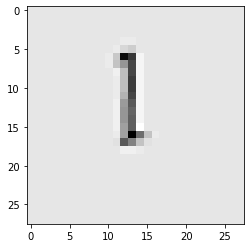

In [ ]:
# 데이터 시각화
plt.imshow(image_1, "gray")

In [ ]:
# (데이터수, 가로, 세로, 채널)
image_1 = image_1[np.newaxis, :, :, np.newaxis]

In [ ]:
image_1.shape

(1, 28, 28, 1)

In [ ]:
# model 불러오기
model = keras.models.load_model("mnist_model.h5")

In [ ]:
# model predict
pred = model.predict(image_1)

In [ ]:
np.sum(pred)

1.0

In [ ]:
np.argmax(pred)

5

In [ ]:
from glob import glob # 아주 유용함

In [ ]:
data_path = glob("./*.jpeg")

In [ ]:
data_path

['./1.jpeg', './2.jpeg', './4.jpeg', './3.jpeg', './5.jpeg']

In [ ]:
data_path.sort(reverse=True)
data_path

['./5.jpeg', './4.jpeg', './3.jpeg', './2.jpeg', './1.jpeg']

In [ ]:
# 빈 array 생성
images = np.empty( (len(data_path),28,28))

In [ ]:
images.shape

(5, 28, 28)

In [ ]:
for i, path in enumerate(data_path):
    image = Image.open(path).convert("L")
    image = image.resize((28,28))
    image = np.array(image) # (28,28) ndarray
    images[i] = image

In [ ]:
images = images[:,:,:,np.newaxis]

In [ ]:
images.shape

(5, 28, 28, 1)

In [ ]:
pred = model.predict(images)

In [ ]:
pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 2.7748255e-15],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 5.2852964e-22],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.1847259e-04, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 9.9988151e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 2.7605992e-11, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 9.8943210e-01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0567936e-02]], dtype=float32)

In [ ]:
for p in pred:
    print(np.argmax(p))

5
5
9
9
5


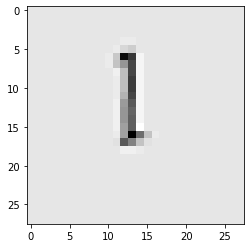

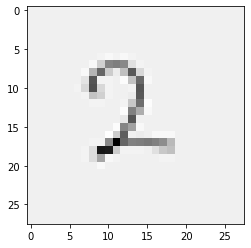

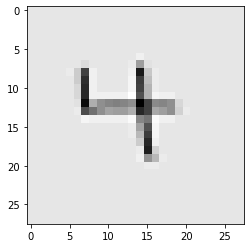

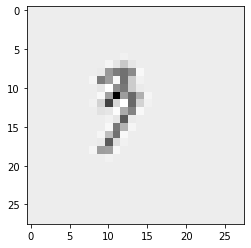

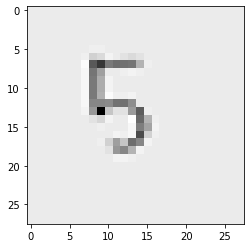

In [ ]:
for i in np.squeeze(images): 
    plt.imshow(i, "gray")
    plt.show()